In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, Adadelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
! pip install translators
! pip install contractions
! pip install textblob
! pip install Pattern
!pip install langdetect
#nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 8.2 MB/s eta 0:00:00
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14596 sha256=7722cc0aa258a7becd6b799aa75aa9ef5146fe4fa624f0b0eb6850b305295ad8
  Stored in directory: /root/.cache/pip/wheels/db/3c/3d/7e9aca234caf6602ae4a4c7b367b3afc03519e791b998a94e4
Successfully built PyExecJS
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 16.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 119.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━

In [3]:
 import nltk
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
#2 construction
from contractions import contractions_dict

#3 translate
import re
import langdetect
import translators as ts

#4 values analysis
import plotly.express as px

#5 sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#6 stopwords

import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')  

#7 WordCloud
from textblob import TextBlob
from pattern.en import pluralize, singularize
from collections import Counter
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

#8 lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

#9 model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#train
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#nltk.downloader.download('vader_lexicon')
#nltk.download('omw-1.4')
#nltk.download('brown')

Using state  server backend.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())  
        while not AttributeError:
            try:
                expanded_contraction = first_char+expanded_contraction[1:]
            except:
                continue
            return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
tweets = pd.read_excel(r'/bitcoin_tweets_2017_2022.xlsx', index_col=[0])
tweets.Date = pd.to_datetime(tweets.Date)

In [28]:
tweets['Date'] = tweets.Date.dt.date

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Translate all to English

In [30]:
import re
import langdetect
import translators as ts

In [31]:
for i in range(0, len(tweets)):
    tweets['Text'][i] = expand_contractions(tweets['Text'][i])
    
    tweets['Text'][i] = re.sub("[^A-Za-z]", " ", tweets['Text'][i])
    tweets['Text'][i] = re.sub(" +", " ",tweets['Text'][i])
    
    
    if len(tweets.loc[i, 'Text']) > 1:
        tweets.loc[i, 'lang'] = langdetect.detect(tweets.loc[i, 'Text'])

In [32]:
tweets_ = tweets

In [33]:
import translators as ts
import translators.server as tss
import warnings
warnings.filterwarnings('ignore')

tweets_ = tweets_[tweets_['lang'].notnull()]
tweets_ = tweets_.loc[tweets_['lang'] != '']
tweets_.reset_index(drop=True, inplace= True)
len(tweets_)

tweets_en = tweets_[tweets_['lang']=='en']
tweets_non_en = tweets_[tweets_['lang']!='en']
tweets_en.reset_index(drop=True, inplace= True)
tweets_non_en.reset_index(drop=True, inplace= True)

tweets_non_en['en'] = ''
tweets_non_en['en'][0] = tss.google(tweets_non_en['Text'][0], from_language=tweets_non_en['lang'][0], to_language='en')


In [58]:
tweets_en

,Username,Handle,Date,Text,Reply_cnt,Retweet_cnt,Like_cnt,lang,Positive,Negative,Neutral
0,Pierre,@pierre_crypt0,2022-11-26,Satoshi created Bitcoin Fast forward years lat...,37.0,49.0,511,en,0.076,0.128,0.797
1,Jason A. Williams,@GoingParabolic,2022-11-26,Bitcoin is dead,224.0,37.0,567,en,0.000,0.683,0.317
2,sunnydecree,@sunnydecree,2022-11-26,Bitcoin Just Bitcoin Not Blockchain and not C...,121.0,42.0,520,en,0.000,0.000,1.000
3,Will Clemente,@WClementeIII,2022-11-26,Anyone saying Bitcoin has no more narratives t...,81.0,24.0,527,en,0.000,0.212,0.788
4,Bitcoin Magazine,@BitcoinMagazine,2022-11-26,Smoothie shop accepting bitcoin in El Salvador,182.0,387.0,2057,en,0.302,0.000,0.698
...,...,...,...,...,...,...,...,...,...,...,...
44401,Charlie,@MoistCr1TiKaL,2017-01-14,WhatIWouldITellA YearOldMe invest everything ...,14.0,261.0,1576,en,0.000,0.000,1.000
44402,CaptainSparklez,@CaptainSparklez,2017-01-14,WhatIWouldTellA YearOldMe Here are the winnin...,32.0,249.0,2524,en,0.395,0.000,0.605
44403,Bitcoin News,@BTCTN,2017-01-11,Did an Assange Just Use the Bitcoin Blockchain...,30.0,563.0,1028,en,0.129,0.000,0.871
44404,WikiLeaks,@wikileaks,2017-01-11,an Assange Just Read Out a Bitcoin Block Hash ...,116.0,906.0,1323,en,0.087,0.193,0.720


In [147]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

tweets_en['Text'] = tweets_en['Text'].astype(str)

sentiments = SentimentIntensityAnalyzer()
tweets_en["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets_en["Text"]]
tweets_en["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets_en["Text"]]
tweets_en["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets_en["Text"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Merging sentiment and BTC data

In [148]:
btc_binance = pd.read_csv(r'//BTC_Binance.csv', delimiter=";")
btc_binance.rename(columns={'UNIX timestamp': 'Date'}, inplace=True)
btc_binance['Date']=btc_binance['Date'].str.replace(',', '.').astype(float)
btc_binance.Date = pd.to_datetime(btc_binance.Date, unit='ms')
btc_binance['Date'] = btc_binance.Date.dt.date
btc_binance

,first_currency,second_currency,Date,open,high,low,close,volume
0,BTC,USDT,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150
1,BTC,USDT,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.890
2,BTC,USDT,2017-08-20,4108.37,4184.69,3850.00,4139.98,381.310
3,BTC,USDT,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083
4,BTC,USDT,2017-08-22,4069.13,4119.62,3911.79,4016.00,691.743
...,...,...,...,...,...,...,...,...
1918,BTC,USDT,2022-11-18,16661.60,16751.00,16410.70,16692.60,228039.000
1919,BTC,USDT,2022-11-19,16692.60,17011.00,16546.00,16700.40,214224.000
1920,BTC,USDT,2022-11-19,16699.40,16822.40,16553.50,16700.70,104963.000
1921,BTC,USDT,2022-11-21,16700.70,16753.30,16180.00,16280.20,154842.000


In [149]:
df_merged_binance = tweets_en.merge(btc_binance, on='Date')
df_merged_binance['NumOfTweets'] = df_merged_binance.groupby('Date')['Date'].transform('count')
df_merged_binance['Std_Positive'] = df_merged_binance.groupby('Date')['Positive'].transform('std')
df_merged_binance['Std_Negative'] = df_merged_binance.groupby('Date')['Negative'].transform('std')
df_merged_binance['Std_Neutral'] = df_merged_binance.groupby('Date')['Neutral'].transform('std')
df_merged_binance['Tweet_Engagement'] = df_merged_binance['Reply_cnt']*df_merged_binance['Retweet_cnt']*df_merged_binance['Like_cnt']/10**7

In [150]:
temp=df_merged_binance.groupby(['Date'])
pos_avg=[]
neg_avg=[]
neu_avg=[]
close=[]
std_Threshold = 0.1

for date in df_merged_binance.Date.unique():
    Temp = temp.get_group(date)
    close.append(Temp['close'].iat[0])
    if Temp['NumOfTweets'].iat[0] == 1:
        pos_avg.append(Temp['Positive'].iat[0])
        neg_avg.append(Temp['Negative'].iat[0])
        neu_avg.append(Temp['Neutral'].iat[0])
        
    else:
        if ((Temp['Std_Positive'].iat[0] < std_Threshold) & (Temp['Std_Negative'].iat[0] < std_Threshold) & (Temp['Std_Neutral'].iat[0] < std_Threshold)):
            pos_avg.append(Temp['Positive'].mean())
            neg_avg.append(Temp['Negative'].mean())
            neu_avg.append(Temp['Neutral'].mean())
        else:
            pos_avg.append(Temp['Positive'][Temp['Tweet_Engagement']==Temp['Tweet_Engagement'].max()].iat[0])
            neg_avg.append(Temp['Negative'][Temp['Tweet_Engagement']==Temp['Tweet_Engagement'].max()].iat[0])
            neu_avg.append(Temp['Neutral'][Temp['Tweet_Engagement']==Temp['Tweet_Engagement'].max()].iat[0])

In [151]:
df = df_merged_binance[['Date','Positive','Negative','Neutral','close']]

In [152]:
sentiment_heuristic1 = pd.DataFrame(list(zip(df_merged_binance.Date.unique().tolist(), pos_avg, neg_avg, neu_avg, close)),
             columns =['Date', 'Positive', 'Negative', 'Neutral', 'close'])

In [153]:
sentiment_heuristic1.set_index("Date",inplace=True)
df = sentiment_heuristic1

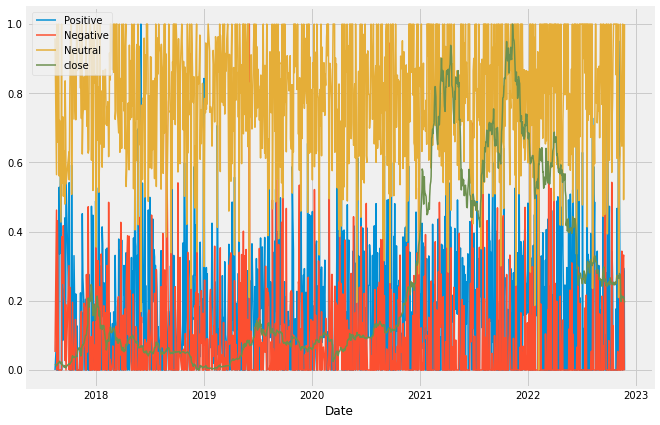

In [155]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(df[['Positive','Negative','Neutral','close']]), # we need to scale the data first
                                     columns=df.columns,
                                     index=df.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Adding block rewards

In [156]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = "2012-11-28"
block_reward_3_datetime = "2016-07-09"
block_reward_4_datetime = "2020-05-11"

In [157]:
from datetime import datetime
block_reward_2_datetime = datetime.strptime(block_reward_2_datetime, '%Y-%m-%d').date()
block_reward_3_datetime = datetime.strptime(block_reward_3_datetime, '%Y-%m-%d').date()
block_reward_4_datetime = datetime.strptime(block_reward_4_datetime, '%Y-%m-%d').date()

In [158]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - sentiment_heuristic1.index[0]).days
block_reward_3_days = (block_reward_4_datetime - sentiment_heuristic1.index[0]).days
block_reward_2_days, block_reward_3_days

(-2327, -925)

In [159]:
# Add block_reward column
df = df.copy()
df["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
df.iloc[:block_reward_2_days, -1] = block_reward_2
df.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
df.iloc[block_reward_3_days:, -1] = block_reward_4
df.head()

,Positive,Negative,Neutral,close,block_reward
Date,,,,,
2022-11-22,0.000,0.000,1.000,15781.3,12.5
2022-11-21,0.180,0.000,0.820,16280.2,12.5
2022-11-19,0.193,0.207,0.600,16700.4,12.5
2022-11-18,0.083,0.203,0.714,16692.6,12.5
2022-11-16,0.000,0.000,1.000,16900.6,12.5


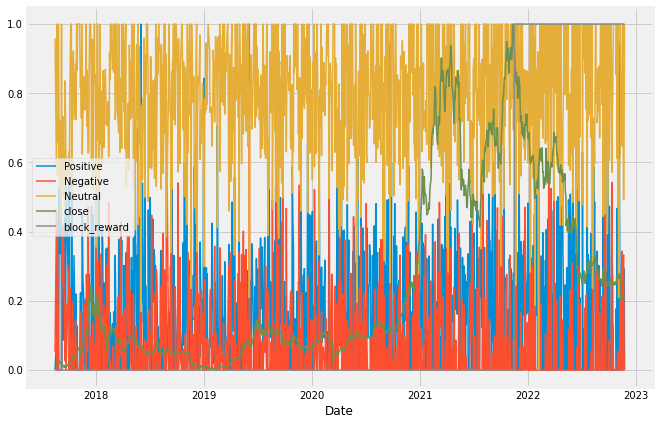

In [160]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(df[['Positive','Negative','Neutral','close', 'block_reward']]), # we need to scale the data first
                                     columns=df.columns,
                                     index=df.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Recursive autoregressive forecasting

In [166]:
df = df.sort_index(ascending=True)

In [167]:
df.head(5)

,Positive,Negative,Neutral,close,block_reward
Date,,,,,
2017-08-17,0.000,0.0325,0.9675,4285.08,6.25
2017-08-22,0.055,0.2880,0.6570,4016.00,6.25
2017-08-23,0.000,0.0000,1.0000,4040.00,6.25
2017-08-25,0.000,0.2690,0.7310,4316.01,6.25
2017-08-29,0.000,0.0000,1.0000,4587.48,6.25


In [168]:
# Plots
!pip install 'skforecast'
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
from sklearn.linear_model import Ridge
# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Train dates : 2017-08-17 --- 2022-11-11  (n=1157)
Test dates  : 2022-11-13 --- 2022-11-22  (n=7)


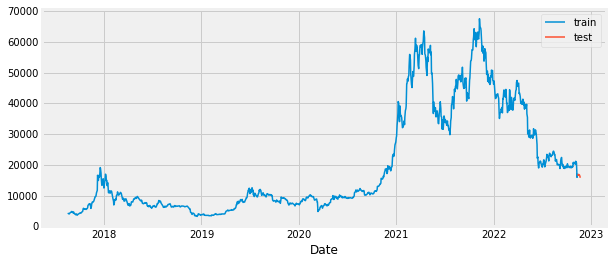

In [169]:
# Split data into train-test
# ==============================================================================
steps = 7
data_train = df[:-steps]
data_test  = df[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['close'].plot(ax=ax, label='train')
data_test['close'].plot(ax=ax, label='test')
ax.legend();

## Ridge regression With exogeneous vars FINAL MODEL with 14 days step

---



In [170]:
# Defining steps
steps = 14
steps = steps
data_train = df.iloc[:-steps, :]
data_test  = df.iloc[-steps:, :]
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                    regressor = Ridge(),
                    lags      = 90
                )

forecaster.fit(
    y    = data_train['close'],
    exog = data_train[['Positive', 'Negative', 'Neutral', 'block_reward']]
)

forecaster
# Predict
# ==============================================================================
steps = steps
predictions = forecaster.predict(
                steps = steps,
                exog = data_test[['Positive', 'Negative', 'Neutral', 'block_reward']]
               )
# Add datetime index to predictions
predictions = pd.DataFrame(predictions)
predictions.index=data_test.index

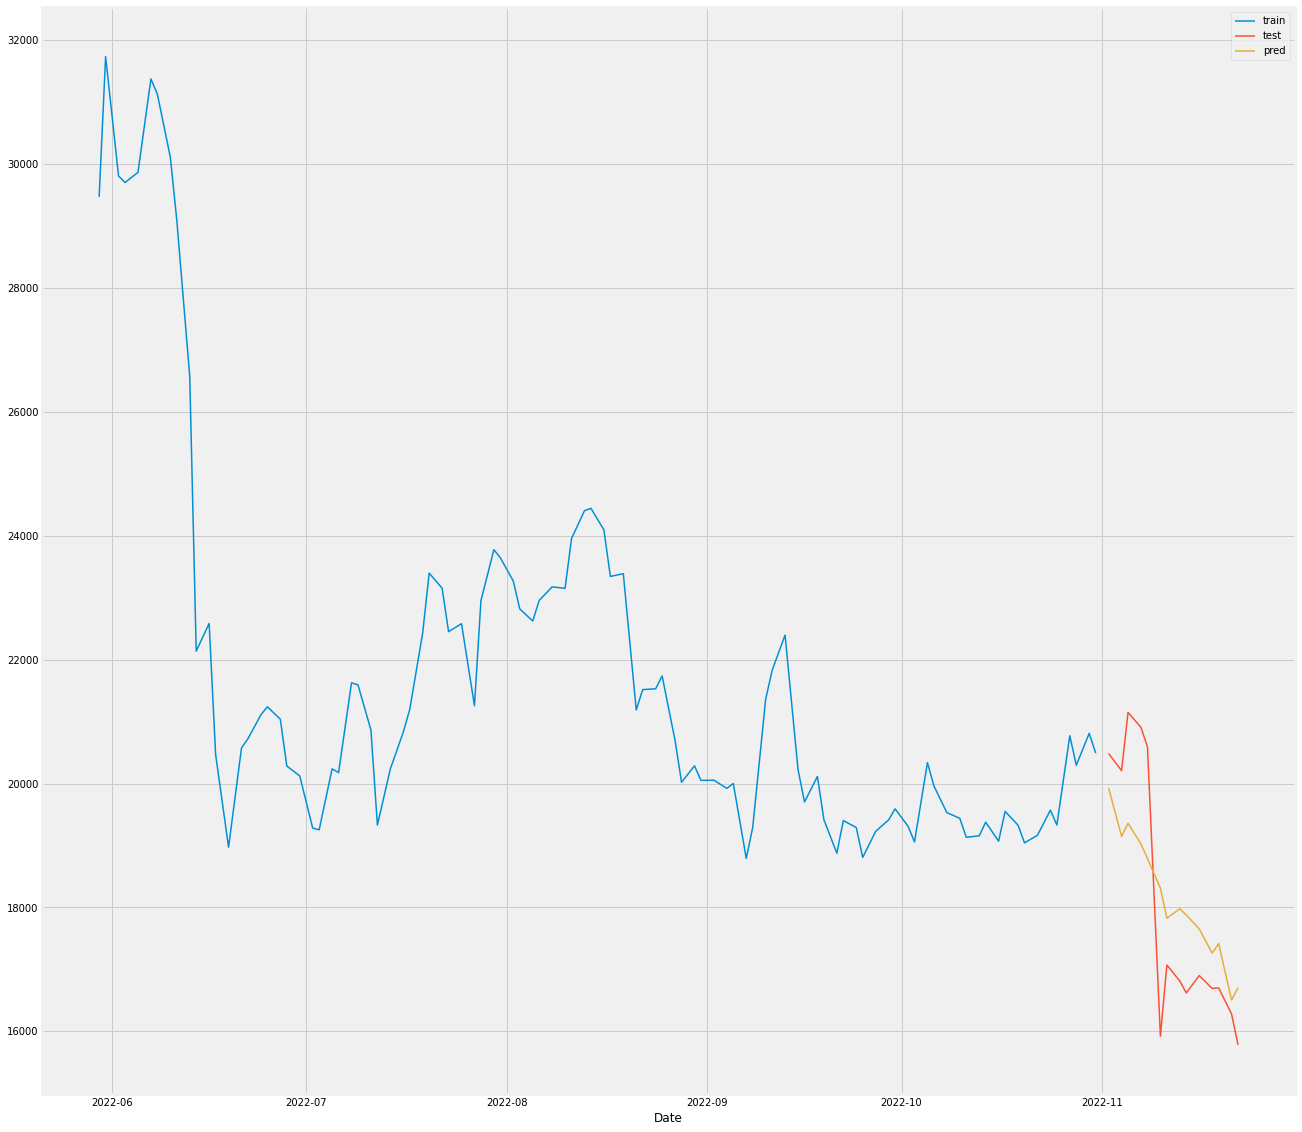

In [171]:

# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(20, 20))
data_train['close'][-100:].plot(ax=ax, label='train')
data_test['close'][-100:].plot(ax=ax, label='test')
predictions[-100:].plot(ax=ax, label='predictions')
ax.legend();

In [172]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['close'],
                y_pred = predictions
            )


error_mae = mean_absolute_error(
                y_true = data_test['close'],
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")
print(f"Test error (mae): {error_mae}")

Test error (mse): 1639943.4355168578
Test error (mae): 1132.0252261161318


## With 7 Days steps

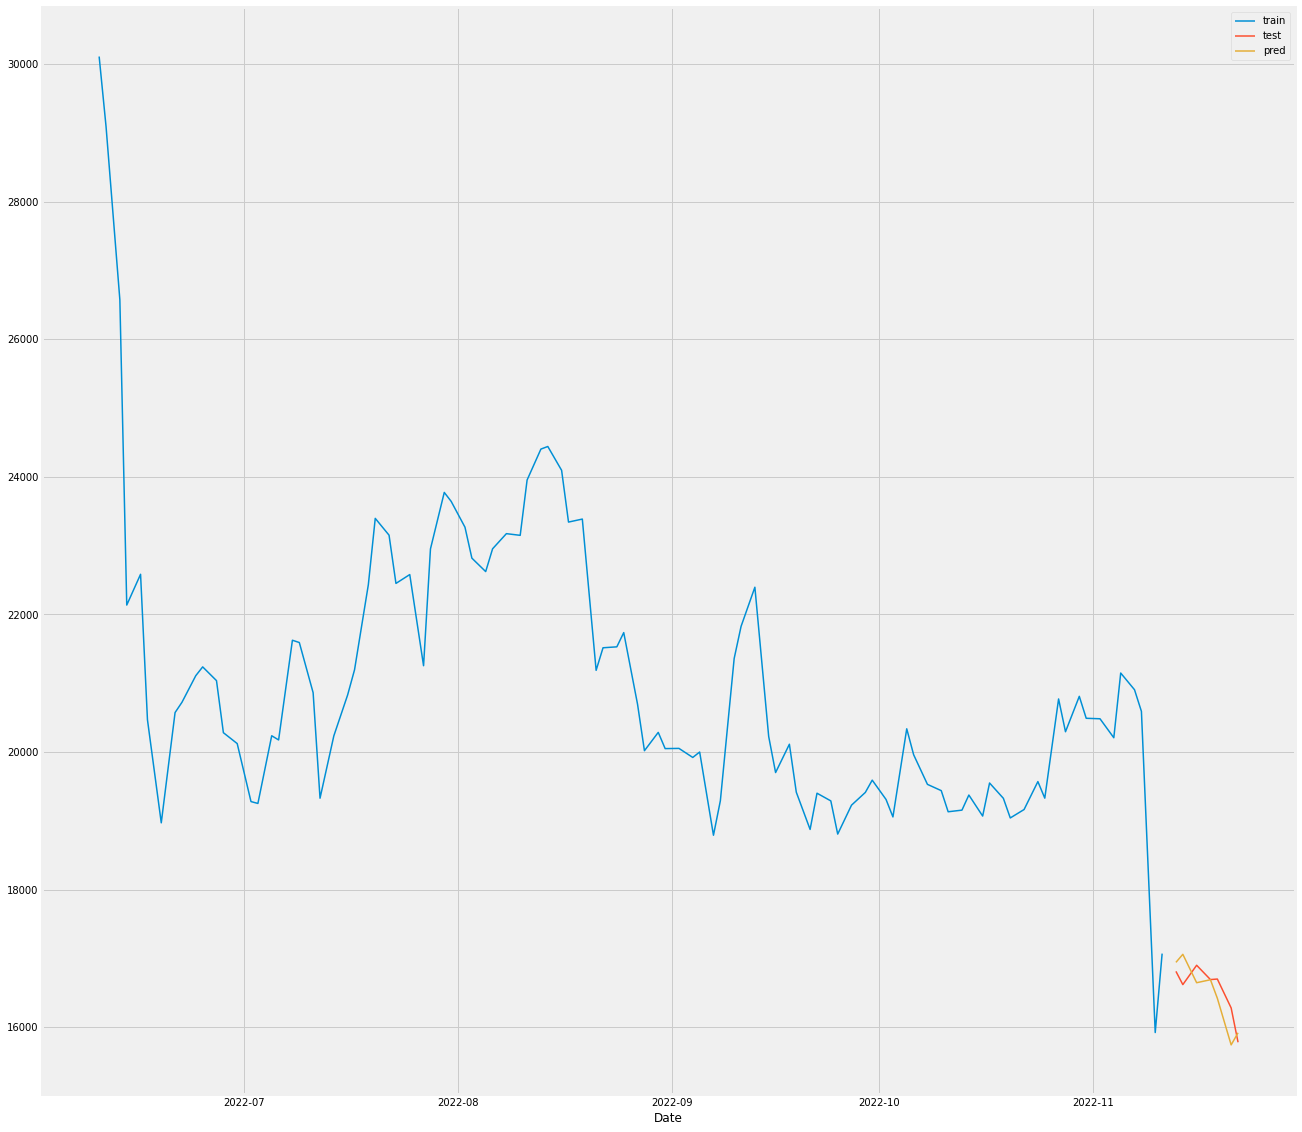

In [173]:
# Defining steps
steps = 7
steps = steps
data_train = df.iloc[:-steps, :]
data_test  = df.iloc[-steps:, :]
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                    regressor = Ridge(),
                    lags      = 90
                )

forecaster.fit(
    y    = data_train['close'],
    exog = data_train[['Positive', 'Negative', 'Neutral', 'block_reward']]
)

forecaster
# Predict
# ==============================================================================
steps = steps
predictions = forecaster.predict(
                steps = steps,
                exog = data_test[['Positive', 'Negative', 'Neutral', 'block_reward']]
               )
# Add datetime index to predictions
predictions = pd.DataFrame(predictions)
predictions.index=data_test.index

# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(20, 20))
data_train['close'][-100:].plot(ax=ax, label='train')
data_test['close'][-100:].plot(ax=ax, label='test')
predictions[-100:].plot(ax=ax, label='predictions')
ax.legend();

In [174]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['close'],
                y_pred = predictions
            )


error_mae = mean_absolute_error(
                y_true = data_test['close'],
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")
print(f"Test error (mae): {error_mae}")

Test error (mse): 94391.65658208964
Test error (mae): 254.50315772596826


## BACKTESTING

In [175]:
# Backtesting
# ==============================================================================
steps = 7
n_backtesting = 7*10 # The last 3 years are separated for the backtest

metric, predictions_backtest = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = df['close'],
                                    initial_train_size = len(df) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    metric             = 'mean_absolute_error',
                                    refit              = True,
                                    verbose            = True
                                )

print(f"Backtest error: {metric}")

Information of backtesting process
----------------------------------
Number of observations used for initial training: 1094
Number of observations used for backtesting: 70
    Number of folds: 10
    Number of steps per fold: 7

Data partition in fold: 0
    Training:   2017-08-17 -- 2022-08-05  (n=1094)
    Validation: 2022-08-06 -- 2022-08-16  (n=7)
Data partition in fold: 1
    Training:   2017-08-17 -- 2022-08-16  (n=1101)
    Validation: 2022-08-17 -- 2022-08-27  (n=7)
Data partition in fold: 2
    Training:   2017-08-17 -- 2022-08-27  (n=1108)
    Validation: 2022-08-28 -- 2022-09-07  (n=7)
Data partition in fold: 3
    Training:   2017-08-17 -- 2022-09-07  (n=1115)
    Validation: 2022-09-08 -- 2022-09-18  (n=7)
Data partition in fold: 4
    Training:   2017-08-17 -- 2022-09-18  (n=1122)
    Validation: 2022-09-19 -- 2022-09-29  (n=7)
Data partition in fold: 5
    Training:   2017-08-17 -- 2022-09-29  (n=1129)
    Validation: 2022-09-30 -- 2022-10-10  (n=7)
Data partition in fo